## INTRUSION DETECTION SYSTEM USING KDD DATASET

In [6]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=50

In [7]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]

In [8]:
import random
rows_to_keep=np.random.choice(list(range(1,4800000)),100000)

In [9]:
data=pd.read_csv('./kddcup.data.corrected',names=datacols,skiprows=lambda x: x not in rows_to_keep)

###  <font color = 'red'> NOTE: Actual data file contains 48 lacs data points , but using this much data would make computation and processing very slow . Hence , we are taking only 1 lac points</font>

In [10]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,222,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40,40,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,222,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51,51,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,54,54,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,332,3270,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,66,1.0,0.0,0.33,0.03,0.0,0.0,0.0,0.0,normal.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98976 entries, 0 to 98975
Data columns (total 42 columns):
duration                       98976 non-null int64
protocol_type                  98976 non-null object
service                        98976 non-null object
flag                           98976 non-null object
src_bytes                      98976 non-null int64
dst_bytes                      98976 non-null int64
land                           98976 non-null int64
wrong_fragment                 98976 non-null int64
urgent                         98976 non-null int64
hot                            98976 non-null int64
num_failed_logins              98976 non-null int64
logged_in                      98976 non-null int64
num_compromised                98976 non-null int64
root_shell                     98976 non-null int64
su_attempted                   98976 non-null int64
num_root                       98976 non-null int64
num_file_creations             98976 non-null int64
num_

In [12]:
data['attack'].value_counts()

smurf.          57092
neptune.        22046
normal.         18950
satan.            329
ipsweep.          246
portsweep.        175
nmap.              48
back.              43
teardrop.          20
warezclient.       19
pod.                7
warezmaster.        1
Name: attack, dtype: int64

#### Map attack field to attack class
NSL-KDD dataset has 42 attributes for each connection record including class label containing attack types. The attack types are categorized into four attack classes as described by Mahbod Tavallaee et al. in A Detailed analysis of the KDD CUP 99 Data Set as:
<br>
<p>
    <b>Denial of Service (DoS)</b>: is an attack in which an adversary directed a deluge of traffic requests to a system in order to make the computing or memory resource too busy or too full to handle legitimate requests and in the process, denies legitimate users access to a machine.
</p>
<br>
<p>
    <b>Probing Attack (Probe)</b>: probing network of computers to gather information to be used to compromise its security controls.
</p>
<br>
<p>
    <b>User to Root Attack (U2R)</b>: a class of exploit in which the adversary starts out with access to a normal user account on the system (gained either by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system.
</p>
<br>
<p>
    <b>Remote to Local Attack (R2L)</b>: occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine.
</p>


In [13]:
mapping = {'ipsweep.': 'Probe','satan.': 'Probe','nmap.': 'Probe','portsweep.': 'Probe','saint.': 'Probe','mscan.': 'Probe',
        'teardrop.': 'DoS','pod.': 'DoS','land.': 'DoS','back.': 'DoS','neptune.': 'DoS','smurf.': 'DoS','mailbomb.': 'DoS',
        'udpstorm.': 'DoS','apache2.': 'DoS','processtable.': 'DoS',
        'perl.': 'U2R','loadmodule.': 'U2R','rootkit.': 'U2R','buffer_overflow.': 'U2R','xterm.': 'U2R','ps.': 'U2R',
        'sqlattack.': 'U2R','httptunnel.': 'U2R',
        'ftp_write.': 'R2L','phf.': 'R2L','guess_passwd.': 'R2L','warezmaster.': 'R2L','warezclient.': 'R2L','imap.': 'R2L',
        'spy.': 'R2L','multihop.': 'R2L','named.': 'R2L','snmpguess.': 'R2L','worm.': 'R2L','snmpgetattack.': 'R2L',
        'xsnoop.': 'R2L','xlock.': 'R2L','sendmail.': 'R2L',
        'normal.': 'Normal'
        }

In [14]:
data['attack_class']=data['attack'].apply(lambda x: mapping[x])
data.drop('attack',axis=1,inplace=True)
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,http,SF,222,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40,40,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,Normal
1,0,tcp,http,SF,222,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51,51,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,Normal
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,54,54,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,Normal


### <font color='green'>Splitting the data into Train and Test </font>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
Y=data['attack_class']
data.drop('attack_class',axis=1,inplace=True)

In [17]:
Y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: attack_class, dtype: object

In [18]:
X_train,X_test,y_train,y_test= train_test_split(data,Y,train_size=0.7,random_state=42)

In [19]:
X_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
37444,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,1.00,0.0,0.00,0.0,0.0,0.0
29727,4,tcp,smtp,SF,978,329,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,102,72,0.71,0.11,0.01,0.0,0.01,0.0,0.0,0.0
53397,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,1.00,0.0,0.00,0.0,0.0,0.0


### <font color='purple'>EXPLORATORY DATA ANALYSIS </font>

In [20]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,69283.000000,6.928300e+04,6.928300e+04,69283.0,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.0,69283.0,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000,69283.000000
mean,47.014708,6.260311e+03,6.769445e+02,0.0,0.000751,0.000014,0.012471,0.000058,0.136816,0.011734,0.000101,0.000130,0.018230,0.000794,0.000101,0.000981,0.0,0.0,0.000823,337.493671,297.106606,0.180124,0.180052,0.058792,0.059014,0.787208,0.021312,0.027908,233.572363,188.702842,0.751765,0.031048,0.608916,0.006420,0.180274,0.179927,0.058920,0.058695
std,688.532184,1.450219e+06,2.275500e+04,0.0,0.046213,0.003799,0.475296,0.015197,0.343655,1.681769,0.010051,0.015664,1.841219,0.054655,0.010051,0.032222,0.0,0.0,0.028671,210.610984,245.695932,0.383684,0.383942,0.234440,0.235087,0.390974,0.082274,0.140700,63.403051,106.237501,0.412581,0.109524,0.480304,0.041061,0.383694,0.383936,0.232825,0.232788
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.200000e+01,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,124.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,38.000000,0.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40571.000000,3.817091e+08,5.150877e+06,0.0,3.000000,1.000000,30.000000,4.000000,1.000000,307.000000,1.000000,2.000000,338.000000,9.000000,1.000000,2.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### We can see that for land, num_outbound_cmds, is_host_login --> all values are zero , hence they are redundant columns and therefore removing them both from train as well as test data

In [21]:
X_train.drop(columns=['land','num_outbound_cmds','is_host_login'],axis=1,inplace=True)
X_test.drop(columns=['land','num_outbound_cmds','is_host_login'],axis=1,inplace=True)


C:\Users\Anuj\Miniconda3\envs\condaenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
X_train.shape,X_test.shape

((69283, 38), (29693, 38))

In [23]:
type(y_train.value_counts())

pandas.core.series.Series

In [24]:
# Attack Class Distribution
attack_class_freq_train = pd.DataFrame(y_train.value_counts())
attack_class_freq_test = pd.DataFrame(y_test.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1,sort=False) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
DoS,55381,79.93,23827,80.24
Normal,13321,19.23,5629,18.96
Probe,569,0.82,229,0.77
R2L,12,0.02,8,0.03


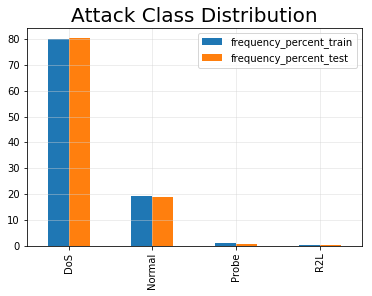

In [27]:
# Attack class bar plot
%matplotlib inline
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);


### Scaling Numerical Attributes

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = X_train.select_dtypes(include=['float64','int64']).columns
scaler.fit(X_train.select_dtypes(include=['float64','int64']))
sc_train = scaler.transform(X_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.transform(X_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### Encoding of Categorical Attributes

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = X_train.select_dtypes(include=['object']).copy()
cattest = X_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)



In [43]:
y_train=pd.DataFrame(y_train,columns=['attack_class'])
y_test=pd.DataFrame(y_test,columns=['attack_class'])


In [44]:
y_train.head()

,attack_class
37444,DoS
29727,Normal
53397,DoS
80471,DoS
17075,Normal


In [45]:
y_train=y_train.apply(encoder.fit_transform)
y_test=y_test.apply(encoder.fit_transform)

In [46]:
y_train.head(3)

,attack_class
37444,0
29727,1
53397,0


In [55]:
encoder.inverse_transform([0,1,2,3])

array(['DoS', 'Normal', 'Probe', 'R2L'], dtype=object)

In [90]:
sc_traindf.reset_index(drop=True,inplace=True)
traincat.reset_index(drop=True,inplace=True)
sc_testdf.reset_index(drop=True,inplace=True)
testcat.reset_index(drop=True,inplace=True)
X_train=pd.concat([sc_traindf,traincat],axis=1)
X_test=pd.concat([sc_testdf,testcat],axis=1)
# X_train=sc_traindf.append(traincat,sort=False)
# X_test=sc_testdf.append(testcat,sort=False)

In [91]:
print(X_train.head(3));
print(X_train.shape);

   duration  src_bytes  dst_bytes  wrong_fragment    urgent       hot  \
0 -0.068283  -0.003605  -0.029749       -0.016241 -0.003799 -0.026238   
1 -0.062474  -0.003642  -0.015291       -0.016241 -0.003799 -0.026238   
2 -0.068283  -0.003605  -0.029749       -0.016241 -0.003799 -0.026238   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0          -0.003799  -0.398122        -0.006978   -0.010052     -0.008293   
1          -0.003799   2.511793        -0.006978   -0.010052     -0.008293   
2          -0.003799  -0.398122        -0.006978   -0.010052     -0.008293   

   num_root  num_file_creations  num_shells  num_access_files  is_guest_login  \
0 -0.009901           -0.014525   -0.010052          -0.03046       -0.028695   
1 -0.009901           -0.014525   -0.010052          -0.03046       -0.028695   
2 -0.009901           -0.014525   -0.010052          -0.03046       -0.028695   

      count  srv_count  serror_rate  srv_serror_rate  rerror_rate  \


### Feature Selection

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train.values.ravel());
# extract important features
score = np.round(rfc.feature_importances_,3)


C:\Users\Anuj\Miniconda3\envs\condaenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [110]:
import matplotlib.pyplot as plt

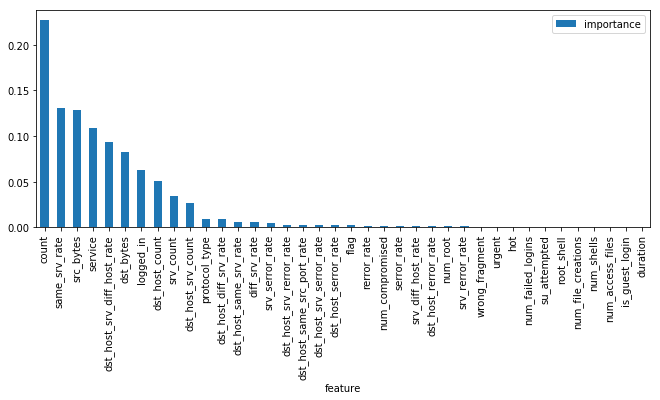

In [111]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [116]:
final_features=list(importances[:10].index)

In [117]:
final_features


['count',
 'same_srv_rate',
 'src_bytes',
 'service',
 'dst_host_srv_diff_host_rate',
 'dst_bytes',
 'logged_in',
 'dst_host_count',
 'srv_count',
 'dst_host_srv_count']

In [120]:
X_train2=X_train.loc[:,final_features]
X_test2=X_test.loc[:,final_features]

In [121]:
X_train2.shape

(69283, 10)

In [124]:
X_train2.describe()

,count,same_srv_rate,src_bytes,service,dst_host_srv_diff_host_rate,dst_bytes,logged_in,dst_host_count,srv_count,dst_host_srv_count
count,6.928300e+04,6.928300e+04,6.928300e+04,69283.000000,69283.000000,6.928300e+04,6.928300e+04,6.928300e+04,6.928300e+04,6.928300e+04
mean,-2.953629e-17,-2.348546e-16,1.948575e-18,23.122916,0.000000,1.333236e-18,4.491978e-17,-1.751666e-16,9.189069e-17,-3.651014e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,13.107429,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.597714e+00,-2.013466e+00,-4.316834e-03,0.000000,-0.156351,-2.974948e-02,-3.981220e-01,-3.668184e+00,-1.205184e+00,-1.766836e+00
25%,-1.013695e+00,5.442656e-01,-4.287873e-03,14.000000,-0.156351,-2.974948e-02,-3.981220e-01,3.379615e-01,-1.164483e+00,-1.418557e+00
50%,8.190816e-01,5.442656e-01,-3.958265e-03,14.000000,-0.156351,-2.974948e-02,-3.981220e-01,3.379615e-01,8.664976e-01,6.240512e-01
75%,8.238297e-01,5.442656e-01,-3.605213e-03,44.000000,-0.156351,-2.974948e-02,-3.981220e-01,3.379615e-01,8.705677e-01,6.240512e-01
max,8.238297e-01,5.442656e-01,2.632055e+02,61.000000,24.197799,2.263344e+02,2.511793e+00,3.379615e-01,8.705677e-01,6.240512e-01


### FITTING THE MODELS

In [139]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train2, y_train.values.ravel()); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(multi_class='auto',n_jobs=-1, random_state=0,solver='lbfgs')
LGR_Classifier.fit(X_train2, y_train.values.ravel());

# Train Gaussian Naive Baye Model
GNB_Classifier = GaussianNB()
GNB_Classifier.fit(X_train2, y_train.values.ravel())
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train2, y_train.values.ravel());
            
# Train RandomForestClassifier Model
#RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
#RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
#SVC_Classifier = SVC(random_state=0)
#SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', GNB_Classifier), 
                 ('Decision Tree Classifier', DTC_Classifier), 
                 ('KNeighborsClassifier', KNN_Classifier), 
                 ('LogisticRegression', LGR_Classifier)
                ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train2, y_train.values.ravel());

In [140]:
from sklearn import metrics

models = []
#models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', GNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
#models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train2, y_train.values.ravel(), cv=10)
    accuracy = metrics.accuracy_score(y_train.values.ravel(), v.predict(X_train2))
    confusion_matrix = metrics.confusion_matrix(y_train.values.ravel(), v.predict(X_train2))
    classification = metrics.classification_report(y_train.values.ravel(), v.predict(X_train2))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9440418572065944

Model Accuracy:
 0.946552545357447

Confusion matrix:
 [[55320    38    23     0]
 [ 2488 10055   138   640]
 [  362    11   193     3]
 [    0     0     0    12]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     55381
           1       1.00      0.75      0.86     13321
           2       0.55      0.34      0.42       569
           3       0.02      1.00      0.04        12

    accuracy                           0.95     69283
   macro avg       0.63      0.77      0.57     69283
weighted avg       0.96      0.95      0.95     69283



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9989752294379093

Model Accuracy:
 0.9997546295628076

Confusion matrix:
 [[55374   

### EVALUATING ON TEST DATA

In [141]:
for i, v in models:
    accuracy = metrics.accuracy_score(y_test.values.ravel(), v.predict(X_test2))
    confusion_matrix = metrics.confusion_matrix(y_test.values.ravel(), v.predict(X_test2))
    classification = metrics.classification_report(y_test.values.ravel(), v.predict(X_test2))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        



============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9466540935574042

Confusion matrix:
 [[23801    17     9     0]
 [ 1042  4224    64   299]
 [  143     6    77     3]
 [    0     0     1     7]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     23827
           1       0.99      0.75      0.86      5629
           2       0.51      0.34      0.41       229
           3       0.02      0.88      0.04         8

    accuracy                           0.95     29693
   macro avg       0.62      0.74      0.57     29693
weighted avg       0.96      0.95      0.95     29693



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9985518472367224

Confusion matrix:
 [[23813     3    11     0]
 [    0  5628     1     0]
 [   12    13   204     0]
 [    0     3     0     